Predicting price range of mobile based on certain specifications

**atrributes**:

**battery_power**: Total energy a battery can store in one time measured in mAh.
**blue**: Has bluetooth or not.
**clock_speed**: speed at which microprocessor executes instructions.

**dual_sim**: Has dual sim support or not.

**fc**: Front Camera mega pixels.

**four_g**: Has 4G or not.

**int_memory**: Internal Memory in Gigabytes.

**m_dep**: Mobile Depth in cm.

**mobile_wt**: Weight of mobile phone.

**n_cores**: Number of cores of processor.

**pc**: Primary Camera mega pixels.

**px_height**: Pixel Resolution Height.

**px_width**: Pixel Resolution Width.

**ram**: Random Access Memory in Mega Bytes.

**sc_h**: Screen Height of mobile in cm.

**sc_w**: Screen Width of mobile in cm.

**talk_time**: longest time that a single battery charge will last when you are.

**three_g**: Has 3G or not.

**touch_screen**: Has touch screen or not.

**wifi**: Has wifi or not.

**price_range**: This is the target variable with value of 0 (low cost), 1(medium cost), 2 (high cost) and 3 (very high cost).

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/mobile_price_range_data.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


<Axes: ylabel='count'>

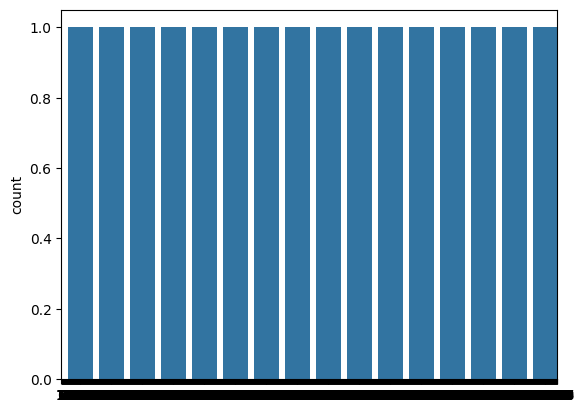

In [3]:
sns.countplot(data['price_range'])

In [4]:
data.shape

(2000, 21)

In [5]:
#Removing null values
data.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
#Defining X and Y
X = data.drop('price_range',axis=1)
Y = data['price_range']

In [8]:
#Splitting data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1400, 20)
(600, 20)
(1400,)
(600,)


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
X_train

array([[-0.7638951 ,  1.01294087, -1.12231393, ..., -1.80067327,
         0.99146499,  1.00142959],
       [-0.09785191,  1.01294087, -1.24355155, ...,  0.55534783,
         0.99146499,  1.00142959],
       [ 0.62915118, -0.98722446,  0.69625031, ...,  0.55534783,
         0.99146499, -0.99857245],
       ...,
       [ 1.32906098,  1.01294087, -1.24355155, ...,  0.55534783,
        -1.00860848,  1.00142959],
       [ 1.55032279, -0.98722446, -0.75860108, ..., -1.80067327,
         0.99146499,  1.00142959],
       [-1.36672064,  1.01294087, -1.12231393, ...,  0.55534783,
        -1.00860848, -0.99857245]])

In [11]:
X_test

array([[ 0.91588842, -0.98722446,  1.18120077, ...,  0.55534783,
         0.99146499, -0.99857245],
       [-0.13171851, -0.98722446, -1.24355155, ...,  0.55534783,
        -1.00860848, -0.99857245],
       [ 1.6519226 , -0.98722446,  1.66615124, ...,  0.55534783,
         0.99146499, -0.99857245],
       ...,
       [-1.54734253,  1.01294087, -1.24355155, ..., -1.80067327,
         0.99146499,  1.00142959],
       [-0.43426017,  1.01294087, -0.03117539, ...,  0.55534783,
        -1.00860848, -0.99857245],
       [-0.40490911,  1.01294087,  0.69625031, ...,  0.55534783,
         0.99146499, -0.99857245]])

**Logistic Regression**

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [13]:
pv1 = lr.predict(X_test)
print(pv1)

[0 2 1 3 1 1 2 0 3 1 0 1 2 3 3 2 3 3 1 0 0 2 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 2 2 2 1 3 1 3 1 0 0 1 0 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 1 3 2 2 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 3 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 0 2 3 1 3 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 1 2 3 3 3 1 0 1 2 2 3 3 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 2 2 3 3 3 1 2 0 0 0 2 1 1 3 1 1 2 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 3 3 0 3 1 2 3 3 2 1 0 3 3 1 3 3 3
 3 3 0 1 2 2 2 3 0 2 3 2 2 2 1 0 2 0 3 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 0 3 3 3 1 0 1 0 1 2 3 0 3
 3 2 1 3 0 0 3 1 3 2 0 1 1 1 1 1 3 1 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 3
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 2 1 1 2 1 3 1 3 1 2 0
 0 1 0 1 0 1 0 2 2 3 2 1 1 2 1 1 3 1 0 0 3 0 1 0 1 2 2 3 0 2 0 1 1 3 3 0 2
 0 2 0 0 3 3 0 2 2 2 3 1 1 0 1 3 1 0 3 1 0 0 3 2 3 2 0 2 1 0 1 2 3 2 1 1 0
 1 2 2 1 1 1 3 1 2 1 3 2 

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
a1 = accuracy_score(Y_test,pv1)
print('Accuracy Score:',a1)
print('\nConfusion Matrix:\n',confusion_matrix(Y_test,pv1))
print('\nClassification Report:\n',classification_report(Y_test,pv1))

Accuracy Score: 0.9583333333333334

Confusion Matrix:
 [[144   7   0   0]
 [  3 142   1   0]
 [  0   7 135   6]
 [  0   0   1 154]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       151
           1       0.91      0.97      0.94       146
           2       0.99      0.91      0.95       148
           3       0.96      0.99      0.98       155

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



## KNN Classification

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=15)

In [16]:
pv2 = knn.predict(X_test)
print(pv2)

[0 1 0 2 1 2 1 0 3 1 1 0 1 3 2 2 2 3 1 0 0 1 0 1 0 1 2 2 1 0 0 0 2 2 3 1 2
 0 3 0 2 3 3 0 2 0 1 0 3 0 3 0 1 0 1 2 3 3 0 0 1 2 2 0 0 0 3 3 2 1 0 1 0 1
 2 0 1 3 2 1 3 0 1 1 0 3 1 2 3 0 2 3 3 1 3 1 2 3 1 2 0 0 2 0 0 3 2 0 0 1 0
 0 2 1 3 2 3 2 0 2 0 1 3 1 3 3 0 2 1 2 2 0 1 2 0 2 1 1 1 1 3 0 3 1 0 0 1 0
 1 2 3 0 2 0 2 2 0 2 0 0 3 3 3 3 1 1 1 0 2 3 2 1 0 0 3 0 0 1 0 1 0 0 0 0 2
 3 1 2 0 1 0 1 1 2 2 2 0 3 2 0 1 1 1 3 2 1 1 2 0 2 0 2 2 1 1 1 0 1 0 1 3 1
 2 0 0 2 0 2 1 1 2 0 1 3 2 0 0 3 1 0 1 3 2 3 0 2 1 3 3 3 3 3 2 3 3 2 3 2 2
 3 3 1 1 2 1 0 2 0 2 3 2 1 2 2 0 1 1 1 3 1 2 0 0 3 2 3 0 0 3 0 0 1 3 2 2 1
 0 1 0 3 2 0 2 1 2 0 2 3 1 3 1 3 3 0 3 1 3 2 0 0 0 2 3 3 1 0 2 0 1 2 2 0 2
 1 1 0 3 0 0 1 0 3 2 0 2 2 1 1 1 3 2 0 0 3 2 0 2 0 0 1 0 0 1 1 2 3 0 3 2 3
 3 3 2 3 2 1 0 3 1 2 3 0 2 3 1 2 3 3 0 1 0 3 0 0 2 2 0 1 0 2 1 1 0 2 1 2 0
 0 1 0 1 0 1 1 1 3 2 1 1 1 1 1 0 1 0 0 1 3 0 3 1 2 2 1 2 0 2 1 1 1 3 3 0 2
 1 1 0 0 3 2 0 0 3 2 3 1 1 0 1 3 1 0 3 1 0 0 3 1 2 2 0 3 2 1 0 2 2 1 1 0 0
 0 0 2 0 1 0 2 1 1 0 2 1 

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
a2 = accuracy_score(Y_test,pv2)
print('Accuracy Score:\n',a2)
print('\nConfusion Matrix:',confusion_matrix(Y_test,pv2))
print('\nClassification Report:\n',classification_report(Y_test,pv2))

Accuracy Score:
 0.5616666666666666

Confusion Matrix: [[115  31   5   0]
 [ 41  71  27   7]
 [ 11  56  61  20]
 [  1   9  55  90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.76      0.72       151
           1       0.43      0.49      0.45       146
           2       0.41      0.41      0.41       148
           3       0.77      0.58      0.66       155

    accuracy                           0.56       600
   macro avg       0.57      0.56      0.56       600
weighted avg       0.58      0.56      0.56       600



## SVM Classifier with linear kernel

In [18]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear',C=0.01)
svm_linear.fit(X_train,Y_train)

SVC(C=0.01, kernel='linear')

In [20]:
pv3 = svm_linear.predict(X_test)
print(pv3)

[0 2 1 3 1 1 2 0 3 1 0 1 1 3 2 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 0 0 3 0 2 1 2
 0 3 0 2 3 2 0 2 2 2 1 3 1 3 1 0 0 1 0 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 1 3 2 2 3 1 1 0 1 3 2 3 3 0 3 3 2 1 3 2 2 3 2 1 0 0 1 0 1 3 2 0 1 1 0
 0 3 1 3 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 2 1 0 0 2 2 0 2 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 2 0 2 2 3 3 2 1 0 1 2 2 2 2 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 2 0 0 0 0 1 3 3 1 0 1 1 1 1 2 2 2 2 3 1 2 0 0 0 2 1 1 3 1 1 2 1 1 3 1
 3 0 0 2 1 3 0 1 1 0 1 3 2 0 1 2 3 0 1 3 2 3 0 3 1 2 3 3 2 1 0 3 3 1 3 3 3
 3 3 0 1 2 2 2 2 0 2 3 2 2 2 1 0 2 0 2 3 1 3 1 0 3 1 2 0 0 2 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 1 3 2 0 2 1 1 1 0 0 0 2 3 3 1 0 1 1 1 2 2 0 2
 3 2 1 3 0 0 3 1 3 2 0 1 1 1 1 1 3 1 0 0 2 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 3
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 2 1 1 2 1 3 1 2 1 2 0
 0 1 0 1 0 2 0 2 2 3 2 1 1 2 1 1 3 1 0 0 3 0 1 0 1 2 2 3 0 2 0 1 1 2 3 0 2
 0 2 0 0 3 3 0 2 2 2 3 1 1 0 1 3 1 0 3 1 0 0 3 2 3 2 0 2 0 0 1 2 3 2 1 1 0
 1 2 2 1 1 1 3 1 2 1 2 2 

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
a3 = accuracy_score(Y_test,pv3)
print('Accuracy Score:',a3)
print('\nConfusion Matrix: ',confusion_matrix(Y_test,pv3))
print('\nClassification Report:\n',classification_report(Y_test,pv3))

Accuracy Score: 0.905

Confusion Matrix:  [[141  10   0   0]
 [  5 134   7   0]
 [  0  14 132   2]
 [  0   0  19 136]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       151
           1       0.85      0.92      0.88       146
           2       0.84      0.89      0.86       148
           3       0.99      0.88      0.93       155

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



## SVM Classifier with rbf kernel

In [22]:
from sklearn.svm import SVC
svm_rbf = SVC(kernel='rbf',C=1)
svm_rbf.fit(X_train,Y_train)

SVC(C=1)

In [23]:
pv = svm_rbf.predict(X_test)
print(pv)

[0 2 1 3 1 1 2 0 3 1 0 1 1 3 2 2 3 3 1 0 0 2 0 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 2 3 1 1 3 1 3 1 0 0 1 0 1 3 0 0 1 3 3 1 0 0 3 3 2 2 1 3 0 1
 2 0 0 3 2 2 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 1 0 3 2 0 0 1 0
 0 3 1 3 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 2 1 0 1 2 3 0 3 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 1 2 3 3 3 1 0 0 2 2 3 2 1 0 0 3 1 1 2 1 1 0 0 0 0 3
 2 0 2 0 0 0 0 1 3 3 2 0 1 2 0 1 1 2 3 3 3 1 2 0 0 0 2 2 1 3 1 0 2 2 1 3 1
 3 0 0 2 1 3 0 1 2 0 1 3 2 0 1 3 3 0 1 3 2 3 0 3 1 2 3 3 2 1 1 3 3 1 3 3 3
 2 3 1 1 2 2 2 3 0 1 3 2 2 2 1 0 1 0 2 3 1 3 1 1 3 1 2 0 0 3 0 1 2 3 2 3 1
 0 0 1 3 3 0 1 2 2 0 3 3 2 3 1 3 2 0 2 1 1 1 0 0 1 3 3 3 1 0 1 0 1 2 2 0 3
 3 2 1 3 0 0 3 1 3 2 0 1 1 1 1 1 3 1 0 0 3 3 0 3 0 0 2 0 1 1 2 2 3 0 2 2 3
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 1 3 3 3 1 0 2 3 0 0 2 3 2 1 1 2 1 3 1 2 1 2 0
 0 1 0 1 0 2 0 2 3 3 2 1 1 2 1 0 3 1 0 0 3 0 2 0 1 1 2 3 0 2 1 1 1 2 3 0 2
 0 2 0 0 3 3 0 2 2 2 3 1 1 0 1 3 1 0 3 1 0 0 3 2 3 2 0 2 1 0 1 2 3 2 1 1 0
 1 2 2 1 1 1 3 1 2 1 2 2 

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
a = accuracy_score(Y_test,pv)
print('Accuracy Score:',a)
print('\nConfusion Matrix: ',confusion_matrix(Y_test,pv))
print('\nClassification Report:\n',classification_report(Y_test,pv))

Accuracy Score: 0.87

Confusion Matrix:  [[135  16   0   0]
 [ 14 123   9   0]
 [  0  19 122   7]
 [  0   0  13 142]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       151
           1       0.78      0.84      0.81       146
           2       0.85      0.82      0.84       148
           3       0.95      0.92      0.93       155

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



## Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train , Y_train)

DecisionTreeClassifier(criterion='entropy')

In [26]:
pv4 = dt.predict(X_test)
print(pv4)

[0 2 1 3 1 1 2 0 3 1 0 1 1 3 2 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 1 2 3 2 0 3 3 1 0 3 1 3 1 0 0 0 0 1 3 0 0 1 3 3 1 0 1 3 3 1 2 2 3 0 1
 2 0 1 3 2 1 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 2 2 2 2 2 1 2 1 3 2 1 3 3 0 3 0 2 3 0 2 3 0 2 1 0 0 2 3 0 3 2 0 0 0 1
 2 3 3 1 1 0 2 2 0 1 0 1 2 3 2 2 1 0 1 2 2 2 3 1 0 0 3 1 2 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 0 2 0 1 2 2 2 3 3 1 2 0 0 1 2 1 1 3 1 0 2 1 1 3 2
 3 0 0 1 1 3 0 0 2 0 2 3 2 1 1 2 3 0 1 3 3 3 0 3 1 2 3 3 2 1 1 3 3 1 3 3 3
 3 3 1 1 1 3 1 3 1 1 3 2 2 2 1 0 2 0 2 3 0 3 1 1 3 1 2 0 0 3 0 1 2 3 3 3 0
 0 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 1 3 2 3 1 0 1 0 2 3 3 1 3
 3 2 1 3 0 0 3 1 3 2 0 1 2 1 0 1 3 1 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 2
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 1 0 2 3 0 0 2 3 1 1 1 2 1 2 1 3 1 2 0
 0 1 0 1 0 1 1 2 2 3 2 1 1 2 1 1 3 1 0 1 3 0 1 0 1 1 3 3 0 2 0 1 1 2 3 0 2
 0 2 0 0 3 3 0 2 2 2 3 1 2 0 1 3 1 0 3 2 0 0 3 2 3 2 0 3 0 0 1 2 3 2 0 1 0
 1 2 2 1 1 1 3 2 2 0 3 2 

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
a4 = accuracy_score(Y_test,pv4)
print('Accuracy Score:',a4)
print('\nConfusion Matrix: ',confusion_matrix(Y_test,pv4))
print('\nClassification Report:\n',classification_report(Y_test,pv4))

Accuracy Score: 0.8433333333333334

Confusion Matrix:  [[129  22   0   0]
 [ 15 123   8   0]
 [  0  18 112  18]
 [  0   0  13 142]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       151
           1       0.75      0.84      0.80       146
           2       0.84      0.76      0.80       148
           3       0.89      0.92      0.90       155

    accuracy                           0.84       600
   macro avg       0.85      0.84      0.84       600
weighted avg       0.85      0.84      0.84       600



## Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=70,criterion='entropy',max_depth=6)
rf.fit(X_train , Y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=70)

In [29]:
pv5 = dt.predict(X_test)
print(pv5)

[0 2 1 3 1 1 2 0 3 1 0 1 1 3 2 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 1 2 3 2 0 3 3 1 0 3 1 3 1 0 0 0 0 1 3 0 0 1 3 3 1 0 1 3 3 1 2 2 3 0 1
 2 0 1 3 2 1 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 2 2 2 2 2 1 2 1 3 2 1 3 3 0 3 0 2 3 0 2 3 0 2 1 0 0 2 3 0 3 2 0 0 0 1
 2 3 3 1 1 0 2 2 0 1 0 1 2 3 2 2 1 0 1 2 2 2 3 1 0 0 3 1 2 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 0 2 0 1 2 2 2 3 3 1 2 0 0 1 2 1 1 3 1 0 2 1 1 3 2
 3 0 0 1 1 3 0 0 2 0 2 3 2 1 1 2 3 0 1 3 3 3 0 3 1 2 3 3 2 1 1 3 3 1 3 3 3
 3 3 1 1 1 3 1 3 1 1 3 2 2 2 1 0 2 0 2 3 0 3 1 1 3 1 2 0 0 3 0 1 2 3 3 3 0
 0 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 1 3 2 3 1 0 1 0 2 3 3 1 3
 3 2 1 3 0 0 3 1 3 2 0 1 2 1 0 1 3 1 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 2
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 1 0 2 3 0 0 2 3 1 1 1 2 1 2 1 3 1 2 0
 0 1 0 1 0 1 1 2 2 3 2 1 1 2 1 1 3 1 0 1 3 0 1 0 1 1 3 3 0 2 0 1 1 2 3 0 2
 0 2 0 0 3 3 0 2 2 2 3 1 2 0 1 3 1 0 3 2 0 0 3 2 3 2 0 3 0 0 1 2 3 2 0 1 0
 1 2 2 1 1 1 3 2 2 0 3 2 

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
a5 = accuracy_score(Y_test,pv5)
print('Accuracy Score:',a5)
print('\nConfusion Matrix: ',confusion_matrix(Y_test,pv5))
print('\nClassification Report:\n',classification_report(Y_test,pv5))

Accuracy Score: 0.8433333333333334

Confusion Matrix:  [[129  22   0   0]
 [ 15 123   8   0]
 [  0  18 112  18]
 [  0   0  13 142]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       151
           1       0.75      0.84      0.80       146
           2       0.84      0.76      0.80       148
           3       0.89      0.92      0.90       155

    accuracy                           0.84       600
   macro avg       0.85      0.84      0.84       600
weighted avg       0.85      0.84      0.84       600



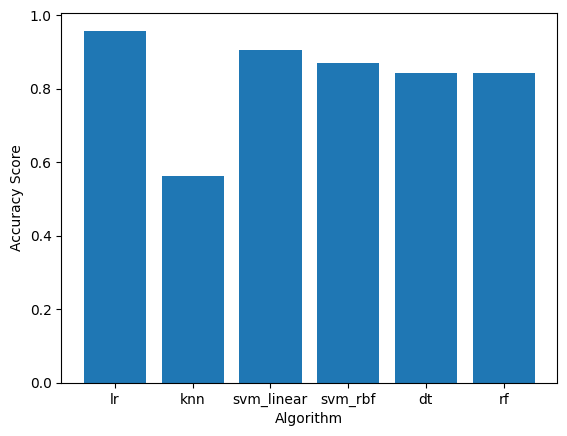

In [31]:
#To check the model with the best accuracy
plt.bar(x=['lr','knn','svm_linear','svm_rbf','dt','rf'],height=[a1,a2,a3,a,a4,a5])
plt.xlabel("Algorithm")
plt.ylabel("Accuracy Score")
plt.show()

In [32]:
print('The model with the best accuracy: Logistic Regression')

The model with the best accuracy: Logistic Regression
